# Weather Regression - SkLearn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Merge
First of all, you have to merge both DataFrames to have a new DataFrame "df2018" DataFrame with 365 rows and 20 columns (indeed, you can drop the date column in double).



In [ ]:
# Your code here :
df2018 = pd.merge(df_main, df_opinion, left_on="DATE", right_on="date", how="left")
del df2018["date"]
print("nb de lignes :", len(df2018))
df2018.head(2)

nb de lignes : 365


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad


In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

# Linear regresssion
There are some missing values in the "Sunhour" column, and you want to fill them.

First, you have to split the DataFrame to have :
- a DF with only rows without NaN, you'll call it "df_clean". This DF should have 341 rows and 20 columns.
- a DF with only rows with NaN in the Sunhour column (The rows you want to fill), you'll call it "df_nan". This DF should have 24 rows and 20 columns.


In [ ]:
# Your code here :
df_clean = df2018[df2018.SUNHOUR.notna()]
print("Nb lignes :", df_clean.shape[0])
print("Nb colonnes :", df_clean.shape[1])

Nb lignes : 341
Nb colonnes : 20


In [ ]:
df_nan = df2018[df2018.SUNHOUR.isna()]
print("Nb lignes :", df_nan.shape[0])
print("Nb colonnes :", df_nan.shape[1])

Nb lignes : 24
Nb colonnes : 20


## Now, train your model
For this part, let's work on df_clean. 
With scikit-learn, find the multivariate linear regression model with the best score (remember to train-test-split your DataFrame "df_clean" before!). 

You are trying to predict `SUNHOUR`, so what's your target `y` ?

Print the R2-score for the test set, and check if you don't have underfitting or overfitting.

In [ ]:
df_clean.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION'],
      dtype='object')

In [ ]:
nulles = df_clean[df_clean.isnull().any(axis=1)]
nulles.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION


### I - 5 sélections différentes de variables explicatives, check score de la régression linéaire puis Train modèles.

In [ ]:
# Train sélection 2
# Sélection, check score reg linéaire
X = df_clean[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT','DEWPOINT_MAX_C', 
       'WINDTEMP_MAX_C', 'TOTAL_SNOW_MM']]
y = df_clean["SUNHOUR"]

model_2 = LinearRegression().fit(X, y)

# train set to 75%, the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# train the model only on the train dataset.
newmodel_set_2 = LinearRegression().fit(X_train, y_train)

# All scores :
print("\nScore for the Train dataset :", newmodel_set_2.score(X_train, y_train))
print("Score for the Test dataset :", newmodel_set_2.score(X_test, y_test))
print("Score initial linear regression :", model_2.score(X, y))
print("Diff train - test :", newmodel_set_2.score(X_train, y_train) - newmodel_set_2.score(X_test, y_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86

Score for the Train dataset : 0.7474357933647704
Score for the Test dataset : 0.689691884494438
Score initial linear regression : 0.7372831937306972
Diff train - test : 0.05774390887033243


In [ ]:

# Train sélection 3
# Sélection, check score reg linéaire
X = df_clean[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'TOTAL_SNOW_MM', 'UV_INDEX']]
y = df_clean["SUNHOUR"]

model_3 = LinearRegression().fit(X, y)

# train set to 75%, the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# train the model only on the train dataset.
newmodel_set_3 = LinearRegression().fit(X_train, y_train)

# All scores :
print("\nScore for the Train dataset :", newmodel_set_3.score(X_train, y_train))
print("Score for the Test dataset :", newmodel_set_3.score(X_test, y_test))
print("Score initial linear regression :", model_3.score(X, y))
print("Diff train - test :", newmodel_set_3.score(X_train, y_train) - newmodel_set_3.score(X_test, y_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86

Score for the Train dataset : 0.7491933701131687
Score for the Test dataset : 0.6835006954470497
Score initial linear regression : 0.7381232050311338
Diff train - test : 0.06569267466611894


In [ ]:
# Train sélection 4
# Sélection, check score reg linéaire
X = df_clean[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT','TOTAL_SNOW_MM']]
y = df_clean["SUNHOUR"]

model_4 = LinearRegression().fit(X, y)

# train set to 75%, the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# train the model only on the train dataset.
newmodel_set_4 = LinearRegression().fit(X_train, y_train)

# All scores :
print("\nScore for the Train dataset :", newmodel_set_4.score(X_train, y_train))
print("Score for the Test dataset :", newmodel_set_4.score(X_test, y_test))
print("Score initial linear regression :", model_4.score(X, y))
print("Diff train - test :", newmodel_set_4.score(X_train, y_train) - newmodel_set_4.score(X_test, y_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86

Score for the Train dataset : 0.7430793561166024
Score for the Test dataset : 0.6862299819176256
Score initial linear regression : 0.7330885947451047
Diff train - test : 0.05684937419897673


In [ ]:
# Train sélection 5
# Sélection, check score reg linéaire
X = df_clean[['TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT','TOTAL_SNOW_MM']]
y = df_clean["SUNHOUR"]

model_5 = LinearRegression().fit(X, y)

# train set to 75%, the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# train the model only on the train dataset.
newmodel_set_5 = LinearRegression().fit(X_train, y_train)

# All scores :
print("\nScore for the Train dataset :", newmodel_set_5.score(X_train, y_train))
print("Score for the Test dataset :", newmodel_set_5.score(X_test, y_test))
print("Score initial linear regression :", model_5.score(X, y))
print("Diff train - test :", newmodel_set_5.score(X_train, y_train) - newmodel_set_5.score(X_test, y_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86

Score for the Train dataset : 0.7098904958388152
Score for the Test dataset : 0.6299126549239128
Score initial linear regression : 0.6943081832649662
Diff train - test : 0.07997784091490245


In [ ]:

# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! WINNER WINNER WINNER WINNER WINNER WINNER WINNER !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! :)

# Train sélection 1
# Sélection, check score reg linéaire
X = df_clean[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'DEWPOINT_MAX_C', 
       'WINDTEMP_MAX_C']]
y = df_clean["SUNHOUR"]

model_1 = LinearRegression().fit(X, y)

# train set to 75%, the rest is for the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

# train the model only on the train dataset.
newmodel_set_1 = LinearRegression().fit(X_train, y_train)

# All scores :
print("\nScore for the Train dataset :", newmodel_set_1.score(X_train, y_train))
print("Score for the Test dataset :", newmodel_set_1.score(X_test, y_test))
print("Score initial linear regression :", model_1.score(X, y))
print("Diff train - test :", newmodel_set_1.score(X_train, y_train) - newmodel_set_1.score(X_test, y_test))

The length of the initial dataset is : 341
The length of the train dataset is   : 255
The length of the test dataset is    : 86

Score for the Train dataset : 0.7477434373015582
Score for the Test dataset : 0.6915190214995932
Score initial linear regression : 0.737902902781328
Diff train - test : 0.05622441580196502


## Predictions
Predict the sunhours values for your DF "df_nan", and store result in the `SUNHOUR` column (which is empty, because this is `df_nan`).

In [ ]:
df_nan.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION'],
      dtype='object')

In [ ]:
df_clean.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_EVENING',
       'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION'],
      dtype='object')

In [ ]:
# Your code here :
# Train sélection 1
df_nan.SUNHOUR = model_1.predict(df_nan[['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'DEWPOINT_MAX_C', 
       'WINDTEMP_MAX_C']])

# arrondi du resultat
df_nan.SUNHOUR = round(df_nan.SUNHOUR, 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
# check df
df_nan.head(2)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
18,2018-01-19,10,6,23,6,10,6,0.7,88,9.875,1020,37.0,10,6,5,NaN,NaN,NaN,7.4,NaN
31,2018-02-01,8,3,17,4,8,4,0.2,81,10.000,1012,39.5,8,3,2,NaN,NaN,NaN,8.2,NaN


In [ ]:
df_clean.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad


## Concatenate and scatterplot

Concatenate both DataFrames to a new one "df2018complete", and draw a scatterplot with Date on X-axis and Sunhours on Y-axis.
Try to add a flag to identify real values and predicted values. 

You should get something like that. Of course, not exactly the same chart, because we don't train the same model, on the same columns, etc...

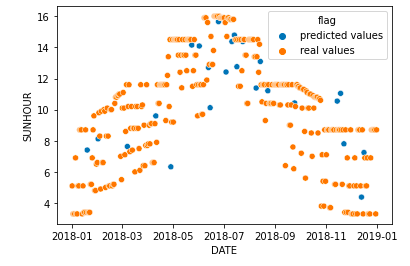

In [ ]:
# concatenate both df
df2018complet = pd.concat([df_clean, df_nan])

In [ ]:
df2018complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 349
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

In [ ]:
# flag colonne predict si opinion nan
df2018complet["flag_predict"] = df2018complet.OPINION.isna()
df2018complet["flag_predict"] = np.where(df2018complet.flag_predict == True, "predicted value", "real value")
df2018complet.head(2)

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag_predict
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7,113.0,0.0,3.0,5.1,bad,real value
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6,122.0,0.0,3.0,3.3,bad,real value


In [ ]:
df2018complet.flag_predict.value_counts()

real value         341
predicted value     24
Name: flag_predict, dtype: int64

In [ ]:
# date setup
df2018complet.DATE = pd.to_datetime(df2018complet.DATE)

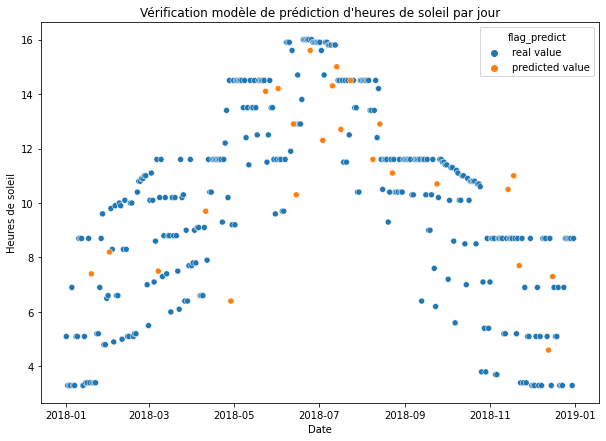

In [ ]:
# Taille de l'affichage
fig, ax = plt.subplots(figsize=(10,7))

# ------------------ Scatter Plot ------------------#

# Graphique nuage de points
sns.scatterplot(data=df2018complet, 
                x="DATE", 
                y="SUNHOUR", 
                hue="flag_predict"
                ).set(
                    xlabel = "Date", 
                    ylabel = "Heures de soleil",
                    title = "Vérification modèle de prédiction d'heures de soleil par jour"
                )


# Afficher graph
fig.show()